In [1]:
import os, sys
import glob
import yaml
import random
import argparse
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D


matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set_style('white')

def set_style():
    sns.set(font='serif', font_scale=1.4)
   
   # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})

matplotlib.rcParams.update({'font.size': 24})
plt.rcParams['xtick.labelsize']=24
plt.rcParams['ytick.labelsize']=24
fontsize = 25

set_style()

In [3]:
our_color = '#f79646'
baseline_color = '#D3D3D3'


In [15]:
# Accuracy evaluation.
concepts = ["above180", "above45", "abovebb", "upright", "near", "upright45", \
            "alignedhorizontal", "alignedvertical", "front", "front45", "ontop"]
datas = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

g = [[93.9, 94.5, 95.7, 97.6, 98.0, 98.3, 98.7, 98.8, 98.8, 98.8],
     [81.5, 93.9, 96.6, 96.0, 96.8, 97.6, 98.0, 98.4, 97.9, 98.4],
     [72.9, 80.9, 82.7, 84.9, 86.5, 87.1, 87.6, 88.5, 88.0, 88.8],
     [91.6, 94.5, 95.6, 96.9, 96.5, 96.8, 96.6, 96.9, 97.1, 97.9],
     [65.6, 85.0, 90.3, 91.9, 92.9, 94.2, 93.3, 95.1, 94.9, 95.7],
     [93.6, 96.1, 97.0, 97.3, 97.7, 98.0, 98.0, 98.2, 98.3, 98.5],
     [83.0, 91.7, 93.6, 94.3, 95.5, 95.9, 95.6, 95.0, 95.4, 97.2],
     [84.6, 92.8, 94.2, 94.9, 95.6, 95.4, 95.5, 97.1, 96.5, 97.2],
     [92.6, 96.1, 97.1, 97.3, 97.8, 97.8, 98.7, 98.9, 98.9, 99.0], #front
     #[93.1, 95.2, 97.5, 97.9, 97.3, 97.3, 98.6, 98.6, 99.1, 98.9], #left
     [83.7, 91.3, 96.0, 97.3, 97.2, 97.5, 97.8, 97.9, 98.4, 98.2], #front45
     #[84.9, 91.9, 95.1, 96.4, 97.2, 96.9, 98.1, 97.8, 98.1, 98.5], #left45
     [89.3, 94.5, 95.7, 96.1, 97.3, 97.3, 97.2, 97.7, 96.9, 95.1]] #ontop


baseline = [[87.1, 86.9, 89.7, 91.3, 91.5, 90.6, 92.0, 91.9, 92.5, 91.7],
            [88.0, 86.3, 89.8, 86.0, 92.5, 92.2, 91.3, 92.2, 94.5, 92.5],
            [80.5, 82.6, 81.3, 82.8, 83.3, 84.9, 84.7, 85.7, 87.0, 86.5],
            [50.4, 51.2, 50.4, 51.0, 52.1, 52.1, 52.5, 52.4, 51.1, 53.5],
            [76.5, 75.9, 82.4, 80.4, 82.3, 85.6, 84.4, 84.1, 88.4, 82.5],
            [54.8, 55.5, 56.8, 61.5, 59.2, 63.3, 66.2, 66.0, 71.3, 70.1],
            [51.6, 51.5, 52.6, 54.7, 54.5, 55.6, 57.4, 57.6, 55.7, 63.4],
            [55.0, 56.6, 61.2, 60.9, 63.0, 64.3, 67.0, 67.8, 69.9, 69.9],
            [51.5, 54.1, 55.0, 54.8, 53.9, 55.7, 55.7, 56.6, 55.3, 56.2], #front
            #[50.1, 50.5, 49.6, 50.6, 50.2, 50.1, 50.5, 50.3, 49.6, 50.4], #left
            [57.1, 55.6, 62.5, 65.1, 66.4, 65.4, 68.6, 69.3, 67.8, 70.0],
            #[50.8, 53.4, 50.2, 53.5, 53.9, 54.7, 55.2, 57.2, 57.7, 58.3], #left45
            [55.6, 50.9, 53.3, 55.6, 54.5, 55.0, 56.4, 57.4, 58.2, 57.4]]

learned = [[95.0, 96.1, 96.1, 96.2, 96.5, 96.5, 96.5, 96.7, 96.6, 96.7],
           [86.6, 94.5, 95.7, 95.9, 95.5, 96.2, 96.4, 96.5, 96.1, 96.5],
           [76.9, 83.9, 85.1, 86.6, 87.3, 87.9, 88.7, 88.6, 88.9, 88.5],
           [85.0, 87.5, 88.9, 88.9, 88.9, 88.8, 89.1, 89.6, 89.0, 89.9],
           [80.2, 91.9, 93.0, 92.9, 93.6, 93.8, 93.5, 93.8, 93.4, 93.3],
           [91.6, 94.0, 94.8, 94.8, 95.1, 94.9, 95.7, 95.5, 95.8, 95.6], #upright45
           [80.9, 85.4, 87.7, 88.3, 88.2, 88.9, 88.8, 89.8, 88.2, 88.2],
           [84.9, 89.8, 91.2, 91.5, 91.4, 90.5, 91.6, 92.4, 90.8, 90.7],
           [87.1, 88.8, 89.0, 88.8, 88.1, 89.1, 88.3, 89.3, 89.0, 89.4], #front
           [55.0, 84.1, 87.1, 84.9, 82.5, 84.3, 84.5, 85.4, 85.6, 84.3], #front45
           [84.4, 86.9, 87.3, 87.7, 88.3, 87.3, 88.1, 88.7, 88.1, 86.6]] #ontop

handcrafted = [[96.7]*10, [96.5]*10, [92.0]*10, [90.0]*10, [94.0]*10, [96.2]*10, \
               [88.3]*10, [89.9]*10, [88.4]*10, [88.3]*10, [88.28]*10]

In [17]:
# Optimization evaluation.
concepts = ["above180", "above45", "abovebb", "upright", "near", "upright45", \
            "alignedhorizontal", "alignedvertical", "front", "front45", "ontop"]
datas = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

baseline = [[99.6, 99.8, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
            [76.0, 88.4, 90.8, 92.6, 97.4, 95.3, 97.3, 97.9, 98.3, 98.1],
            [6.5, 68.5, 74.8, 85.9, 67.2, 74.8, 64.0, 78.9, 84.7, 88.2],
            [53.0, 57.7, 59.8, 60.0, 60.8, 62.8, 63.1, 65.9, 56.8, 69.5],
            [86.8, 88.6, 93.3, 91.7, 95.7, 97.4, 97.6, 97.9, 98.4, 97.1],
            [13.0, 7.8, 17.7, 26.3, 32.6, 28.6, 43.5, 44.0, 54.5, 49.7], #upright45
            [7.9, 12.4, 16.1, 9.4, 18.5, 20.2, 21.2, 19.2, 20.1, 26.2],
            [15.4, 6.9, 18.7, 16.7, 19.5, 25.8, 23.7, 34.4, 28.1, 36.9],
            [53.2, 58.0, 62.4, 65.1, 61.6, 64.7, 65.7, 69.0, 68.6, 64.0], #front
            [5.7, 10.3, 16.2, 15.7, 18.6, 18.5, 24.0, 26.9, 21.0, 27.0], #front45
            [7.1, 3.0, 4.7, 10.3, 6.7, 9.6, 9.5, 9.1, 12.5, 14.0]] #ontop

learned = [[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
           [83.6, 97.8, 98.4, 98.9, 96.8, 98.8, 99.2, 98.8, 98.7, 97.6],
           [44.9, 60.7, 70.8, 73.7, 83.9, 87.8, 87.7, 87.9, 89.7, 87.0],
           [88.0, 87.9, 88.5, 89.4, 89.7, 88.2, 89.5, 88.9, 89.0, 89.5],
           [98.7, 99.6, 99.3, 99.3, 99.6, 99.7, 99.4, 99.1, 99.3, 99.2],
           [83.3, 72.2, 83.9, 80.3, 77.8, 79.8, 90.4, 89.3, 89.5, 90.8],
           [79.5, 87.2, 91.5, 90.9, 90.2, 91.0, 92.0, 91.9, 90.4, 93.3],
           [83.4, 90.9, 91.3, 90.6, 90.1, 92.0, 91.2, 92.7, 92.8, 90.5],
           [95.8, 95.2, 95.7, 96.3, 94.9, 95.7, 95.1, 96.3, 96.2, 96.7], #front
           [27.0, 69.0, 69.5, 68.4, 69.0, 68.7, 68.8, 71.3, 71.5, 68.8], #front45
           [73.2, 75.8, 75.7, 75.7, 76.8, 75.6, 75.7, 76.8, 75.3, 73.9]]

handcrafted = [[100.0]*10, [99.6]*10, [97.6]*10, [88.9]*10, [99.2]*10, [76.0]*10, 
               [93.1]*10, [90.6]*10, [96.2]*10, [67.9]*10, [76.6]*10]

In [6]:
# AL results on ngc.
strats = ["random", "confusion,", "confrand", "random_1000", "confusion_1000", "confrand_1000"]
concepts = ["above45", "abovebb", "upright", "near", "upright45", \
            "alignedhorizontal", "alignedvertical", "front", "front45", "ontop"]
datas = np.linspace(100, 1000, 10)
g_AL = [[[0.592, 0.6313, 0.6137, 0.6266, 0.6911, 0.6882, 0.75395, 0.7494, 0.7529, 0.7997],
         [0.51350, 0.59340, 0.79705, 0.82200, 0.91700, 0.93065, 0.93145, 0.92865, 0.95610, 0.96330],
         [0.557, 0.65085, 0.6805, 0.76195, 0.8486, 0.90515, 0.93345, 0.93565, 0.9285, 0.94435], 
         [0.6233, 0.66755, 0.7837, 0.84795, 0.8669, 0.89295, 0.8636, 0.8868, 0.862, 0.9109],
         [0.65710, 0.78380, 0.88430, 0.92340, 0.93050, 0.94040, 0.94660, 0.95755, 0.95920, 0.95650],
         [0.71055, 0.81775, 0.83305, 0.888, 0.87335, 0.9211, 0.94905, 0.931, 0.9121, 0.92535]],
        \
        [[0.5452, 0.55745, 0.57545, 0.6124, 0.6668, 0.68495, 0.70895, 0.7203, 0.73025, 0.73435],
         [0.57115, 0.56115, 0.5786, 0.63300, 0.65270, 0.66270, 0.66965, 0.70805, 0.71025, 0.73010],
         [0.52825, 0.547, 0.56705, 0.645, 0.6945, 0.70985, 0.7429, 0.7503, 0.7539, 0.7703],
         [0.66565, 0.7432, 0.76255, 0.7891, 0.7999, 0.80305, 0.80035, 0.8178, 0.814, 0.819],
         [0.59260, 0.61955, 0.64370, 0.66820, 0.68890, 0.72285, 0.74040, 0.75155, 0.76745, 0.78575],
         [0.6327, 0.7539, 0.73765, 0.76945, 0.78375, 0.7761, 0.78375, 0.7951, 0.78605, 0.7975]],
        \
        [[0.91, 0.9466, 0.95025, 0.9679, 0.9674, 0.96945, 0.9673, 0.9688, 0.97395, 0.97245],
         [0.84325, 0.94325, 0.97410, 0.97785, 0.97970, 0.98340, 0.98645, 0.98750, 0.98535, 0.98495],
         [0.91035, 0.9577, 0.96385, 0.96745, 0.9726, 0.97705, 0.97865, 0.98235, 0.98285, 0.985],
         [0.8641, 0.90975, 0.9267, 0.9444, 0.9619, 0.96845, 0.9673, 0.97215, 0.97405, 0.9733],
         [0.89845, 0.93745, 0.96610, 0.96270, 0.94980, 0.97725, 0.97610, 0.97195, 0.97705, 0.98470],
         [0.8883, 0.9459, 0.95805, 0.964, 0.9725, 0.97025, 0.9738, 0.97555, 0.9785, 0.98195]],
        \
        [[0.72925, 0.86415, 0.901, 0.90995, 0.906, 0.92705, 0.91845, 0.9314, 0.94005, 0.9425],
         [0.50610, 0.61300, 0.80950, 0.91045, 0.93320, 0.94270, 0.95615, 0.95345, 0.96050, 0.96690],
         [0.6908, 0.8628, 0.90075, 0.92835, 0.9335, 0.9346, 0.9373, 0.9441, 0.95265, 0.95685],
         [0.55395, 0.7456, 0.8248, 0.86585, 0.8771, 0.86715, 0.87895, 0.89025, 0.89605, 0.9116],
         [0.58050, 0.72035, 0.81985, 0.84950, 0.91695, 0.92530, 0.94310, 0.93295, 0.94035, 0.95125],
         [0.66195, 0.77025, 0.8673, 0.899, 0.91285, 0.92695, 0.93295, 0.92025, 0.9256, 0.93185]],
        \
        [[0.87175, 0.93745, 0.94605, 0.9529, 0.95615, 0.95955, 0.96045, 0.9634, 0.95975, 0.965],
         [0.68490, 0.83335, 0.90735, 0.93755, 0.94895, 0.95380, 0.95355, 0.96425, 0.93790, 0.95100],
         [0.63555, 0.9075, 0.96785, 0.96485, 0.97405, 0.96875, 0.97765, 0.97855, 0.98635, 0.98405],
         [0.884, 0.91505, 0.9683, 0.9729, 0.9645, 0.96145, 0.96575, 0.96345, 0.97545, 0.9836],
         [0.94275, 0.95435, 0.96570, 0.97745, 0.97770, 0.98050, 0.98520, 0.98420, 0.98465, 0.98110],
         [0.90705, 0.96105, 0.97455, 0.97515, 0.9786, 0.97615, 0.9794, 0.9807, 0.9851, 0.98465]],
        \
        [[0.58305, 0.63755, 0.6354, 0.75215, 0.79495, 0.8146, 0.85825, 0.84505, 0.84805, 0.85245],
         [0.55715, 0.56625, 0.62585, 0.68645, 0.71990, 0.72430, 0.73625, 0.76275, 0.79525, 0.80650],
         [0.57775, 0.6319, 0.6746, 0.77065, 0.81195, 0.83525, 0.886, 0.92, 0.91905, 0.905],
         [0.59535, 0.63195, 0.69095, 0.7137, 0.72825, 0.77045, 0.78085, 0.8345, 0.8568, 0.89905],
         [0.59570, 0.67845, 0.68695, 0.72225, 0.73660, 0.74225, 0.76015, 0.75605, 0.76700, 0.78310],
         [0.58745, 0.77585, 0.80195, 0.85525, 0.88825, 0.9027, 0.92905, 0.9394, 0.9513, 0.95115]],
        \
        [[0.5408, 0.6977, 0.7548, 0.77675, 0.81, 0.83615, 0.8435, 0.8737, 0.8825, 0.9111],
         [0.64020, 0.65155, 0.71810, 0.78110, 0.85010, 0.88795, 0.88525, 0.89810, 0.89195, 0.92785],
         [0.61425, 0.6955, 0.78645, 0.8041, 0.86995, 0.90205, 0.92075, 0.91565, 0.9231, 0.91435],
         [0.6623, 0.6958, 0.7394, 0.78985, 0.81645, 0.89445, 0.90475, 0.90955, 0.8934, 0.91],
         [0.64715, 0.68645, 0.71110, 0.76370, 0.77080, 0.82260, 0.86870, 0.86555, 0.87365, 0.87725],
         [0.7039, 0.7286, 0.7832, 0.8492, 0.8758, 0.91785, 0.951, 0.93745, 0.9423, 0.95415]],
        \
        [[0.93115, 0.9652, 0.9712, 0.9816, 0.97975, 0.98195, 0.9796, 0.9869, 0.9871, 0.9846],
         [0.89195, 0.96490, 0.98415, 0.99275, 0.99565, 0.99780, 0.99725, 0.99805, 0.99825, 0.99890],
         [0.9414, 0.97135, 0.9867, 0.9928, 0.99305, 0.9965, 0.9971, 0.9976, 0.99795, 0.9981],
         [0.88715, 0.95965, 0.9642, 0.9726, 0.9768, 0.9819, 0.9814, 0.98405, 0.9872, 0.986],
         [0.88730, 0.94810, 0.98295, 0.98800, 0.99215, 0.99485, 0.99535, 0.99745, 0.99795, 0.99875],
         [0.8574, 0.93795, 0.9649, 0.9828, 0.98885, 0.99105, 0.99455, 0.996, 0.9973, 0.9975]],
        \
        [[0.5236, 0.6051, 0.65825, 0.6962, 0.70045, 0.78095, 0.825, 0.83895, 0.88285, 0.8764],
         [0.52015, 0.65085, 0.66940, 0.83435, 0.90820, 0.92830, 0.93975, 0.94240, 0.91435, 0.93630],
         [0.5264, 0.61, 0.6836, 0.73565, 0.8185, 0.9054, 0.9054, 0.92545, 0.9399, 0.93105],
         [0.6967, 0.7348, 0.76715, 0.76265, 0.8246, 0.82685, 0.81235, 0.79225, 0.88545, 0.8194],
         [0.63775, 0.82910, 0.86515, 0.86190, 0.89070, 0.90555, 0.94180, 0.90175, 0.95690, 0.95685],
         [0.6033, 0.58615, 0.79145, 0.834, 0.8997, 0.93845, 0.9491, 0.94905, 0.96525, 0.95905]],
        \
        [[0.5116, 0.5489, 0.6028, 0.6309, 0.6228, 0.71175, 0.743, 0.74255, 0.7552, 0.7618],
         [0.56905, 0.62385, 0.75625, 0.83100, 0.92655, 0.92020, 0.92320, 0.94690, 0.95190, 0.96520],
         [0.5028, 0.52375, 0.5413, 0.63795, 0.7103, 0.79865, 0.88975, 0.92735, 0.9547, 0.9158],
         [0.53505, 0.554, 0.67015, 0.6714, 0.7283, 0.7292, 0.76635, 0.8124, 0.8498, 0.79405],
         [0.62355, 0.68550, 0.79145, 0.85695, 0.91275, 0.92695, 0.93730, 0.94280, 0.94865, 0.94255],
         [0.6263, 0.6891, 0.8003, 0.88525, 0.87715, 0.92055, 0.93485, 0.931, 0.9489, 0.94185]]
       ]

In [ ]:
# Accuracy evaluation for AL results
concepts = ["above45", "abovebb", "upright", "near", "upright45", \
            "alignedhorizontal", "alignedvertical", "front", "front45", "ontop"]
datas = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

baseline = [[64.72, 67.135, 57.075, 65.065, 66.7, 67.66, 65.795, 69.82, 71.39, 70.82],
            [59.91, 61.88, 62.06, 65.56, 68.4, 69.875, 69.04, 66.785, 68.375, 70.225],
            [49.855, 50.915, 50.340, 49.835, 49.95, 49.93, 49.935, 50.225, 50.21, 50.22],
            [75.07, 77.485, 75.845, 78.56, 82.455, 83.93, 82.92, 82.815, 82.39, 85.42],
            [50.245, 49.7, 50.89, 51.705, 52.06, 54.045, 54.175, 52.385, 53.55, 55.73],
            [49.905, 49.505, 50.265, 49.475, 50.01, 49.73, 50.185, 49.91, 50.015, 49.685],
            [50.645, 51.44, 50.895, 51.015, 52.34, 50.05, 51.465, 50.53, 51.5, 53.225],
            [50.145, 51.345, 51.19, 52.575, 51.205, 50.15, 51.37, 51.075, 49.875, 51.805],
            [50.065, 52.175, 51.835, 51.16, 50.52, 50.815, 50.51, 51.285, 52.18, 51.655],
            [49.93, 49.97, 50.04, 50.36, 49.985, 50.175, 50.05, 50.675, 50.91, 50.24]]

learned_nMnA = [[55.5, 60.1, 59.1, 57.0, 67.2, 67.1, 72.9, 69.2, 72.3, 81.7],
                [51.0, 52.4, 53.8, 59.2, 65.7, _, _, 70.4, 71.6, 73.1],
                [85.4, 87.5, 87.7, 88.7, 88.5, 88.9, 88.6, 88.5, 88.9, 89.2],
                [84.8, 89.6, _, _, _, 90.5, 91.4, 92.4, 91.4, 92.4],
                [86.5, 92.1, 92.6, 93.1, 93.9, 94.2, 94.2, 93.4, 93.6, 93.9],
                [52.5, 57.3, 59.2, 67.0, 72.0, 72.0, 77.4, 76.0, 75.7, 75.2],
                [52.3, 64.0, 64.6, 68.8, 72.6, 74.5, 76.3, 77.6, 79.7, 82.9],
                [84.2, 87.6, 86.6, 87.0, 87.1, 86.8, 87.8, 87.5, 87.5, 87.3],
                [50.2, 53.6, 57.4, 57.7, 59.2, 63.1, 66.8, 68.4, 72.2, 68.9],
                [50.0, 51.6, 54.1, 56.9, 55.3, 63.4, 65.2, 66.7, 66.3, 66.9]]
learned_MnA = [[56.6, 61.6, 76.9, 85.8, 86.5, 89.9, 84.2, 86.1, 83.7, 88.3],
                [66.0, 76.1, 75.1, 80.5, 81.6, 81.8, 82.0, 81.6, 79.9, 79.7],
                [80.5, 85.2, 86.5, 87.8, 88.5, 89.2, 88.2, 88.9, 89.0, 89.2],
                [55.9, 81.6, 88.5, 89.8, 90.7, 88.3, 89.9, 90.9, 91.0, 92.0],
                [85.4, 89.1, 93.9, 95.0, 94.4, 93.8, 93.9, 92.9, 95.2, 95.8],
                [53.4, 55.6, 59.9, 60.4, 64.5, 64.6, 67.1, 72.0, 75.9, 80.6],
                [62.2, 61.5, 66.5, 74.3, 74,4, 81.7, 82.2, 82.7, 79.6, 82.6],
                [80.0, 86.7, 85.8, 86.9, 86.9, 87.0, 87.3, 86.9, 86.8, 87.5],
                [64.3, 62.8, 63.4, 61.9, 67.4, 66.1, 65.0, 63.0, 70.8, 66.0],
                [51.1, 52.1, 61.3, 61.7, 64.4, 65.6, 67.9, 71.2, 73.7, 71.0]]
learned_nMA = [[52.0, 66.3, 64.0, 73.1, 83.6, 88.7, 91.5, 91.2, 92.0, 91.7],
               [50.6, 52.5, 53.6, 63.4, 71.1, 71.8, 71.6, 73.9, 76.8, 75.0],
               [85.8, 87.9, 88.2, 88.2, 89.1, 89.3, 89.1, 89.6, 89.6, 89.9],
               [83.1, 90.4, 90.8, 91.4, 91.9, 90.9, 91.6, 92.7, 92.6, 92.9],
               [56.4, 89.6, 94.4, 94.0, 94.4, 94.6, 94.7, 95.1, 96.0, 95.5],
               [53.7, 56.6, 57.9, 68.1, 69.2, 72.3, 76.8, 81.5, 79.0, 78.8],
               [58.7, 64.4, 73.2, 72.6, _, 82.7, 83.6, 83.7, 83.1, 82.7],
               [85.7, 86.8, 86.6, 87.4, 87.5, 87.6, 87.6, 87.7, 87.5, 87.6],
               [50.6, 53.6, 55.4, 60.5, 63.9, 70.4, 72.7, 73.7, 72.0, 74.1],
               [50.2, 50.5, 51.2, 57.4, 62.3, 70.0, 75.9, 80.2, 85.4, 79.9]]
learned_MA = [[70.4, 80.0, 83.5, 88.2, 85.7, 92.6, 93.5, 93.1, 91.1, 92.5],
              [62.9, 76.8, 72.1, 77.2, 78.6, 75.8, 77.1, 79.4, 76.9, 78.8],
              [83.0, 86.6, 88.1, 88.6, 88.6, 89.0, 89.0, 89.0, 89.4, 89.6],
              [65.2, 85.2, 89.8, 91.4, 92.0, 92.6, 91.7, 90.8, 91.7, 91.9],
              [89.4, 93.8, 94.3, 95.1, 94.7, 94.9, 95.1, 95.0, 95.3, 95.3],
              [52.4, 69.1, 70.5, 75.5, 78.5, 79.1, 81.8, 83.0, 82.3, 82.4],
              [64.8, 66.3, 71.7, 77.9, 80.6, 81.7, 85.7, 85.5, 86.6, 87.0],
              [77.3, 83.7, 86.7, 87.6, 87.7, 87.5, 87.4, 87.5, 88.2, 87.8],
              [55.6, 52.1, 62.7, 66.5, 70.3, 73.8, 72.5, 74.5, 74.4, 75.4],
              [59.0, 60.3, 70.1, 78.0, 76.3, 80.2, 80.4, 80.2, 82.1, 82.2]]

In [ ]:
# Optimization evaluation.
concepts = ["above45", "abovebb", "upright", "near", "upright45", \
            "alignedhorizontal", "alignedvertical", "front", "front45", "ontop"]
datas = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

baseline = [[88.0, 80.6, 79.5, 87.6, 83.2, 93.1, 84.8, 95.7, 95.4, 86.3],
            [57.1, 69.5, 63.2, 62.0, 48.2, 70.4, 66.9, 76.5, 67.2, 78.7],
            [54.8, 52.5, 50.6, 50.7, 55.3, 57.2, 59.3, 57.5, 54.3, 53.5],
            [92.6, 90.3, 88.2, 94.1, 96.0, 96.5, 96.5, 96.6, 97.0, 96.4],
            [17.3, 3.0, 6.6, 14.8, 11.7, 17.2, 19.1, 17.5, 10.6, 17.3],
            [6.5, 6.8, 7.2, 6.6, 8.5, 8.2, 6.5, 8.4, 8.4, 6.9],
            [5.4, 6.9, 8.3, 7.7, 7.8, 9.2, 9.7, 15.3, 6.3, 10.7],
            [50.1, 52.7, 54.5, 56.9, 53.6, 49.5, 53.2, 50.2, 49.8, 51.3],
            [2.0, 9.3, 4.9, 5.5, 6.3, 4.4, 5.5, 7.2, 7.1, 6.8],
            [4.0, 3.6, 8.2, 7.8, 7.8, 6.4, 6.6, 5.0, 6.1, 7.8]]

learned_nMnA = [[63.2, 58.6, 64.6, 74.4, 84.4, 84.4, _, _, 91.8, 98.7],
                [16.7, 22.7, 18.6, _, 50.8, _, _, _, 66.9, 68.1],
                [85.4, 87.5, 87.7, 88.7, 88.5, 88.9, 88.6, 88.5, 88.9, 89.2],
                [97.9, 98.7, _, _, _, _, 88.0, 99.5, _, _],
                [70.9, 72.4, 73.3, 83.6, 74.5, 86.6, 80.5, 78.3, 85.4, 88.4],
                [30.2, 53.2, 59.4, 77.3, 78.7, 81.0, 85.3, 87.2, 85.6, 82.9],
                [24.4, 67.7, 77.1, 80.7, 83.9, 84.5, 84.1, 85.0, 85.8, 88.5],
                [93.7, 94.6, 94.3, 94.0, 94.9, 94.9, 94.4, 94.5, 94.3, 95.4],
                [8.7, 29.0, 34.8, 38.4, 41.5, 47.5, 54.4, 52.4, 55.9, 55.3],
                [6.3, 18.8, 32.3, 33.0, 33.1, 48.6, 49.7, 50.2, 49.8, 53.4]]
learned_MnA = [[58.3, 60.7, 85.8, 97.7, 98.1, 94.4, 92.9, 95.4, 96.9, 98.3],
               [22.9, 52.8, 43.8, 57.7, 70.3, 73.7, 81.3, 77.1, 80.0, 81.9],
               [83.1, 88.2, 88.0, 86.5, 89.2, 89.2, 87.8, 85.3, 87.0, 88.5],
               [61.2, 98.5, 98.8, 99.5, 99.2, 99.3, 99.1, 99.0, 99.2, 99.2],
               [75.1, 79.8, 85.3, 86.4, 85.0, 72.9, 84.3, 85.2, 77.4, 83.6],
               [45.7, 51.4, 68.2, 68.6, 75.9, 77.6, 80.4, 84.6, 86.7, 87.5],
               [63.8, 69.3, 77.6, 81.9, 82.2, 88.7, 88.6, 88.0, 90.1, 86.1],
               [91.2, 94.8, 94.4, 94.4, 94.3, 94.6, 94.6, 94.6, 94.5, 94.7],
               [34.3, 44.0, 47.5, 45.0, 50.2, 50.4, 49.4, 44.3, 56.2, 52.7],
               [11.8, 18.3, 47.8, 48.7, 53.8, 54.9, 56.3, 59.3, 59.7, 59.5]]
learned_nMA = [[37.6, 70.9, 92.4, 97.0, 98.6, 99.3, 98.4, 99.2, 99.0, 99.3],
               [7.5, 20.4, 42.3, 57.4, 69.0, 73.4, 73.2, 71.7, 79.0, 81.2],
               [87.3, 86.7, 85.7, 86.4, 88.6, 85.3, 89.1, 88.4, 86.1, 86.3],
               [95.4, 99.0, 99.2, 99.4, 99.4, 99.1, 99.4, 99.5, 99.5, 99.6],
               [48.7, 80.3, 86.8, 84.2, 87.3, 89.3, 83.8, 85.7, 85.8, 87.7],
               [37.1, 47.5, 64.2, 75.8, 80.6, 84.3, 85.1, 88.7, 85.4, 87.2],
               [51.3, 70.1, 80.1, 82.0, _, 89.7, 89.8, 86.0, 88.9, 88.9],
               [94.0, 94.9, 94.0, 94.4, 94.8, 95.1, 94.3, 94.6, 93.8, 94.5],
               [4.7, 25.9, 39.1, 45.7, 50.1, 59.2, 58.4, 58.5, 59.5, 58.1],
               [5.5, 10.2, 20.6, 38.5, 51.5, 55.0, 61.7, 65.2, 69.5, 64.5]]
learned_MA = [[60.9, 98.0, 98.2, 98.8, 98.7, 98.3, 97.4, 98.7, 98.5, 99.2],
              [20.9, 57.3, 54.7, 70.4, 66.0, 71.9, 71.4, 75.1, 79.0, 78.3],
              [85.1, 85.1, 88.6, 86.8, 87.7, 88.5, 86.8, 86.9, 86.1, 84.4],
              [96.1, 98.5, 99.1, 99.5, 99.4, 99.3, 99.3, 99.6, 99.2, 99.2],
              [66.4, 81.4, 85.8, 88.1, 86.9, 84.4, 85.8, 82.1, 85.6, 89.8],
              [44.1, 79.3, 81.4, 84.5, 86.0, 86.8, 88.1, 88.6, 89.2, 90.5],
              [68.8, 73.1, 80.5, 83.0, 86.4, 87.0, 90.8, 90.6, 90.3, 90.1],
              [90.0, 93.0, 94.6, 94.5, 95.4, 94.7, 94.6, 95.2, 94.7, 95.1],
              [20.2, 19.2, 49.8, 51.2, 56.1, 58.2, 58.3, 58.6, 59.5, 60.9],
              [26.2, 38.9, 53.3, 65.1, 63.9, 65.6, 62.9, 64.2, 67.6, 66.7]]

In [ ]:
# Feature query analysis.

concepts = ["above45", "abovebb", "upright", "near", "upright45", \
            "alignedhorizontal", "alignedvertical", "front", "front45", "ontop"]
datas = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

g_feature = [[0.51745, 0.6612, 0.5918, 0.72085, 0.7213, 0.841, 0.83955, 0.85345, 0.73935, 0.8075],
             [0.52595, 0.644, 0.66385, 0.7572, 0.7043, 0.72335, 0.74395, 0.7362, 0.75265, 0.75535],
             [0.92265, 0.9374, 0.96005, 0.9589, 0.96055, 0.9704, 0.97215, 0.972, 0.9751, 0.97385],
             [0.74105, 0.8846, 0.87475, 0.8703, 0.8993, 0.9401, 0.9123, 0.94985, 0.9382, 0.9235],
             [0.93545, 0.9263, 0.93495, 0.9476, 0.93395, 0.9655, 0.95765, 0.96375, 0.96135, 0.96535],
             [0.5835, 0.6003, 0.67755, 0.7551, 0.7987, 0.73485, 0.84995, 0.8891, 0.86265, 0.9078],
             [0.63545, 0.6426, 0.778, 0.7361, 0.8143, 0.913, 0.90905, 0.9071, 0.91625, 0.95305],
             [0.92585, 0.9583, 0.9455, 0.9778, 0.9739, 0.9783, 0.9792, 0.9884, 0.9876, 0.98035],
             [0.5273, 0.6417, 0.7248, 0.6687, 0.82935, 0.7436, 0.81185, 0.7855, 0.88105, 0.88325],
             [0.58355, 0.5826, 0.6777, 0.79695, 0.79095, 0.84995, 0.7682, 0.8179, 0.8384, 0.8405]]

g_nofeature = [[0.50285, 0.5199, 0.51835, 0.52555, 0.52205, 0.5369, 0.5425, 0.58075, 0.5194, 0.5868],
               [0.5055, 0.51915, 0.52975, 0.58165, 0.57145, 0.6161, 0.60265, 0.6242, 0.60385, 0.62705],
               [0.76875, 0.8793, 0.905, 0.9089, 0.9201, 0.9213, 0.9309, 0.93225, 0.9361, 0.92865],
               [0.51345, 0.5294, 0.5828, 0.5971, 0.67725, 0.7391, 0.7869, 0.76585, 0.8205, 0.834],
               [0.55625, 0.6466, 0.72175, 0.75955, 0.85635, 0.8701, 0.8987, 0.9104, 0.87845, 0.89845],
               [0.5084, 0.5143, 0.5132, 0.52345, 0.5702, 0.52405, 0.54505, 0.56235, 0.59055, 0.57845],
               [0.5108, 0.51755, 0.52375, 0.5371, 0.53945, 0.5415, 0.61425, 0.56545, 0.5784, 0.62555],
               [0.76095, 0.82475, 0.85725, 0.9163, 0.9076, 0.9489, 0.94085, 0.94475, 0.9511, 0.95455],
               [0.5095, 0.52105, 0.52915, 0.53655, 0.60855, 0.54025, 0.56705, 0.5341, 0.57855, 0.5591],
               [0.513, 0.5068, 0.52425, 0.5672, 0.53885, 0.55595, 0.5546, 0.5623, 0.57385, 0.56525]]


In [19]:
majority = [96.42, 89.8625, 87.55, 91.65, 89.07, 96.11, 96.25]
print(np.mean(majority))

92.41607142857141


In [4]:
# Demo query analysis.

concepts = ["above45", "abovebb", "upright", "near", "upright45", \
            "alignedhorizontal", "alignedvertical", "front", "front45", "ontop"]
datas = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

majority = [96.42, 89.8625, 50, 72.7181, 87.55, 91.65, 89.07, 50, 96.11, 96.25]

g_demo = [[81.5, 93.9, 96.6, 96.0, 96.8, 97.6, 98.0, 98.4, 97.9, 98.4],
         [72.9, 80.9, 82.7, 84.9, 86.5, 87.1, 87.6, 88.5, 88.0, 88.8],
         [91.6, 94.5, 95.6, 96.9, 96.5, 96.8, 96.6, 96.9, 97.1, 97.9],
         [65.6, 85.0, 90.3, 91.9, 92.9, 94.2, 93.3, 95.1, 94.9, 95.7],
         [93.6, 96.1, 97.0, 97.3, 97.7, 98.0, 98.0, 98.2, 98.3, 98.5],
         [83.0, 91.7, 93.6, 94.3, 95.5, 95.9, 95.6, 95.0, 95.4, 97.2],
         [84.6, 92.8, 94.2, 94.9, 95.6, 95.4, 95.5, 97.1, 96.5, 97.2],
         [92.6, 96.1, 97.1, 97.3, 97.8, 97.8, 98.7, 98.9, 98.9, 99.0], #front
         [83.7, 91.3, 96.0, 97.3, 97.2, 97.5, 97.8, 97.9, 98.4, 98.2], #front45
         [89.3, 94.5, 95.7, 96.1, 97.3, 97.3, 97.2, 97.7, 96.9, 95.1]] #ontop

g_random = [[0.592, 0.6313, 0.6137, 0.6266, 0.6911, 0.6882, 0.75395, 0.7494, 0.7529, 0.7997],
            [0.5452, 0.55745, 0.57545, 0.6124, 0.6668, 0.68495, 0.70895, 0.7203, 0.73025, 0.73435],
            [0.91, 0.9466, 0.95025, 0.9679, 0.9674, 0.96945, 0.9673, 0.9688, 0.97395, 0.97245],
            [0.72925, 0.86415, 0.901, 0.90995, 0.906, 0.92705, 0.91845, 0.9314, 0.94005, 0.9425],
            [0.87175, 0.93745, 0.94605, 0.9529, 0.95615, 0.95955, 0.96045, 0.9634, 0.95975, 0.965],
            [0.58305, 0.63755, 0.6354, 0.75215, 0.79495, 0.8146, 0.85825, 0.84505, 0.84805, 0.85245],
            [0.5408, 0.6977, 0.7548, 0.77675, 0.81, 0.83615, 0.8435, 0.8737, 0.8825, 0.9111],
            [0.93115, 0.9652, 0.9712, 0.9816, 0.97975, 0.98195, 0.9796, 0.9869, 0.9871, 0.9846],
            [0.5236, 0.6051, 0.65825, 0.6962, 0.70045, 0.78095, 0.825, 0.83895, 0.88285, 0.8764],
            [0.5116, 0.5489, 0.6028, 0.6309, 0.6228, 0.71175, 0.743, 0.74255, 0.7552, 0.7618]]

g_demonofeat = [[0.6728, 0.75345, 0.77035, 0.8456, 0.82915, 0.89565, 0.9151, 0.91135, 0.92675, 0.92895],
                [0.59255, 0.64045, 0.68935, 0.72285, 0.772, 0.7911, 0.81425, 0.78985, 0.8295, 0.82335],
                [0.51525, 0.5468, 0.5861, 0.63135, 0.69665, 0.7767, 0.7936, 0.85, 0.8613, 0.8646],
                [0.68095, 0.84755, 0.89825, 0.91405, 0.9242, 0.94795, 0.94645, 0.9558, 0.95145, 0.96055],
                [0.58555, 0.6042, 0.7098, 0.8029, 0.84725, 0.8716, 0.89975, 0.9084, 0.92595, 0.9392],
                [0.5244, 0.67175, 0.74505, 0.80925, 0.7767, 0.87115, 0.9177, 0.90445, 0.89975, 0.92455], 
                [0.73485, 0.8174, 0.8775, 0.90655, 0.9115, 0.93175, 0.933, 0.9439, 0.95755, 0.9546],
                [0.61315, 0.7396, 0.7909, 0.8111, 0.8127, 0.83115, 0.857, 0.8832, 0.8622, 0.89945],
                [0.6562, 0.7599, 0.77495, 0.787, 0.81865, 0.8534, 0.8506, 0.88195, 0.87785, 0.90745]]

In [ ]:
# Noise analysis.

concepts = ["above45", "abovebb", "near", "upright45", \
            "alignedhorizontal", "alignedvertical", "front", "front45", "ontop"]
noises = [0, 0.01, 0.05, 0.1, 0.25, 0.5]
datas = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


g_AL = [[[93.9, 81.5, 96.6, 96.0, 96.8, 97.6, 98.0, 98.4, 97.9, 98.4],
         [81.515, 93.575, 95.615, 96.23, 96.31, 96.62, 95.5, 96.81, 96.94, 98.155],
         [79.72, 85.135, 90.35, 91.13, 88.135, 91.12, 92.04, 92.45, 92.06, 93.525],
         [75.34, 79.205, 87.22, 88.61, 84.98, 88.135, 88.8, 90.615, 88.635, 90.905],
         [74.445, 64.4, 73.45, 72.87, 70.87, 71.24, 69.75, 72.075, 72.835, 73.38],
         [54.55, 53.89, 48.88, 46.08, 47.36, 51.2, 48.785, 50.045, 49.64, 49.5]],
        \
        [[80.9, 72.9, 82.7, 84.9, 86.5, 87.1, 87.6, 88.5, 88.0, 88.8],
         [72.85, 81.37, 83.34, 85.62, 86.98, 87.07, 87.675, 87.63, 87.36, 88.19],
         [68.78, 78.73, 82.16, 79.97, 79.88, 79.98, 80.71, 81.42, 81.525, 84.01],
         [68.14, 74.155, 74.67, 73.81, 75.58, 77.91, 80.13, 82.1, 80.55, 81.98],
         [61.15, 61.18, 67.18, 65.54, 65.285, 68.59, 63.56, 64.18, 67.92, 69.45],
         [52.46, 46.76, 53.48, 47.33, 47.88, 51.8, 47.16, 49.625, 48.85, 50.85]],
        \
        [[85.0, 65.6, 90.3, 91.9, 92.9, 94.2, 93.3, 95.1, 94.9, 95.7],
         [65.57, 84.985, 91.15, 92.195, 93.33, 92.5, 93.505, 93.825, 93.835, 93.21],
         [66.79, 81.405, 84.835, 86.055, 86.715, 88.17, 88.02, 88.27, 88.72, 89.65],
         [66.585, 72.075, 78.47, 78.835, 81.035, 82.85, 86.135, 86.27, 86.25, 87.17],
         [55.25, 58.26, 66.53, 70.165, 68.72, 68.425, 68.835, 70.575, 73.5, 73.74],
         [49.14, 52.455, 48.8, 49.565, 47.55, 51.295, 50.73, 48.25, 50.535, 52.15]],
        \
        [[96.1, 93.6, 97.0, 97.3, 97.7, 98.0, 98.0, 98.2, 98.3, 98.5],
         [93.59, 94.935, 96.26, 96.615, 96.8, 96.67, 96.875, 97.99, 97.67, 97.52],
         [88.83, 87.36, 89.05, 89.785, 92.57, 92.145, 93.45, 94.805,94.75, 94.39],
         [82.4, 85.53, 88.76, 89.855, 85.89, 88.635, 87.215, 93.07, 88.45, 84.285],
         [70.35, 70.46, 75.05, 79.495, 71.54, 72.8, 66.33, 76.985, 78.56, 80.04],
         [51.89, 46.75, 53.32, 47.5, 48.3, 56.25, 44.87, 54.25, 54.32, 52.6]],
        \
        [[91.7, 83.0, 93.6, 94.3, 95.5, 95.9, 95.6, 95.0, 95.4, 97.2],
         [82.96, 92.03, 93.31, 93.905, 95.04, 94.67, 95.45, 95.24, 94.9, 95.315],
         [73.7, 82.26, 87.77, 86.0, 88.49, 86.92, 88.71, 89.64, 91.98, 91.315],
         [72.35, 80.61, 84.58, 83.3, 82.125, 81.83, 87.715, 85.5, 88.9, 86.66],
         [59.26, 68.22, 71.94, 72.5, 74.825, 73.51, 65.07, 70.9, 72.6 70.25],
         [52.6, 52.67, 52.32, 46.48, 48.965, 53.87, 49.15, 50.5, 51.5, 50.49]],
        \
        [[92.8, 84.6, 94.2, 94.9, 95.6, 95.4, 95.5, 97.1, 96.5, 97.2], 
         [0.9537, 0.84565, 0.9297, 0.93935, 0.9426, 0.94165, 0.94515, 0.95405, 0.94895, 0.958], 
         [0.90025, 0.8175, 0.84135, 0.8525, 0.88175, 0.8616, 0.8818, 0.90155, 0.88405, 0.8999],
         [0.8529, 0.72705, 0.75845, 0.82895, 0.85075, 0.80135, 0.8316, 0.83695, 0.84525, 0.87095], 
         [0.71515, 0.62565, 0.6396, 0.6827, 0.7243, 0.70005, 0.6928, 0.6648, 0.6992, 0.7132], 
         [0.52705, 0.5009, 0.54145, 0.52575, 0.48025, 0.46935, 0.51295, 0.4905, 0.5094, 0.46735]],
        \
        [[96.1, 92.6, 97.1, 97.3, 97.8, 97.8, 98.7, 98.9, 98.9, 99.0], 
          [0.97935, 0.92605, 0.95055, 0.9607, 0.9575, 0.97645, 0.97105, 0.97215, 0.9758, 0.9795], 
          [0.96685, 0.85005, 0.8718, 0.88605, 0.9025, 0.9115, 0.90265, 0.9302, 0.888, 0.9491], 
          [0.8971, 0.79765, 0.8238, 0.8859, 0.8823, 0.8752, 0.88715, 0.88045, 0.89565, 0.8883], 
          [0.76485, 0.7348, 0.6523, 0.75395, 0.7374, 0.7489, 0.71225, 0.7294, 0.7232, 0.7646], 
          [0.4981, 0.4871, 0.55765, 0.54935, 0.4368, 0.48755, 0.5227, 0.4774, 0.50395, 0.51345]],
        \
        [[91.3, 83.7, 96.0, 97.3, 97.2, 97.5, 97.8, 97.9, 98.4, 98.2], 
         [0.9541, 0.83675, 0.911, 0.94385, 0.9631, 0.9649, 0.9696, 0.9601, 0.9711, 0.9684], 
         [0.94605, 0.829, 0.86735, 0.87595, 0.9059, 0.8978, 0.8984, 0.9288, 0.911, 0.939], 
         [0.8963, 0.757, 0.8155, 0.8645, 0.86075, 0.8931, 0.8724, 0.88165, 0.8969, 0.84065], 
         [0.76635, 0.69835, 0.69625, 0.73115, 0.70745, 0.7086, 0.7659, 0.68865, 0.713, 0.74075], 
         [0.5311, 0.5041, 0.52725, 0.51335, 0.4985, 0.46135, 0.5055, 0.4781, 0.52175, 0.49705]],
        \
        [[94.5, 89.3, 95.7, 96.1, 97.3, 97.3, 97.2, 97.7, 96.9, 95.1], 
         [0.96715, 0.89275, 0.9163, 0.9512, 0.9509, 0.9664, 0.96785, 0.95965, 0.9648, 0.97115], 
         [0.9266, 0.7496, 0.8395, 0.8936, 0.9102, 0.90205, 0.91885, 0.9158, 0.8891, 0.9281], 
         [0.88125, 0.75565, 0.6969, 0.8414, 0.8608, 0.883, 0.8728, 0.86685, 0.8692, 0.89105], 
         [0.79265, 0.70405, 0.661, 0.74565, 0.7099, 0.6897, 0.7249, 0.69125, 0.6841, 0.72485], 
         [0.522, 0.5308, 0.5668, 0.54735, 0.4457, 0.52955, 0.5425, 0.5028, 0.4885, 0.4831]]
       ]

In [16]:
elts = "0.96715 0.92660 0.88125 0.79265 0.52200 0.89275 0.74960 0.75565 0.70405 0.53080 0.91630 0.83950 0.69690 0.66100 0.56680 0.95120 0.89360 0.84140 0.74565 0.54735 0.95090 0.91020 0.86080 0.70990 0.44570 0.96640 0.90205 0.88300 0.68970 0.52955 0.96785 0.91885 0.87280 0.72490 0.54250 0.95965 0.91580 0.86685 0.69125 0.50280 0.96480 0.88910 0.86920 0.68410 0.48850 0.97115 0.92810 0.89105 0.72485 0.48310"
elems = elts.split(" ")
table = [[0]*10, [],[],[],[],[]]
for i,e in enumerate(elems):
    table[i%5+1].append(float(e))
print(table)
    

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.96715, 0.89275, 0.9163, 0.9512, 0.9509, 0.9664, 0.96785, 0.95965, 0.9648, 0.97115], [0.9266, 0.7496, 0.8395, 0.8936, 0.9102, 0.90205, 0.91885, 0.9158, 0.8891, 0.9281], [0.88125, 0.75565, 0.6969, 0.8414, 0.8608, 0.883, 0.8728, 0.86685, 0.8692, 0.89105], [0.79265, 0.70405, 0.661, 0.74565, 0.7099, 0.6897, 0.7249, 0.69125, 0.6841, 0.72485], [0.522, 0.5308, 0.5668, 0.54735, 0.4457, 0.52955, 0.5425, 0.5028, 0.4885, 0.4831]]


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino


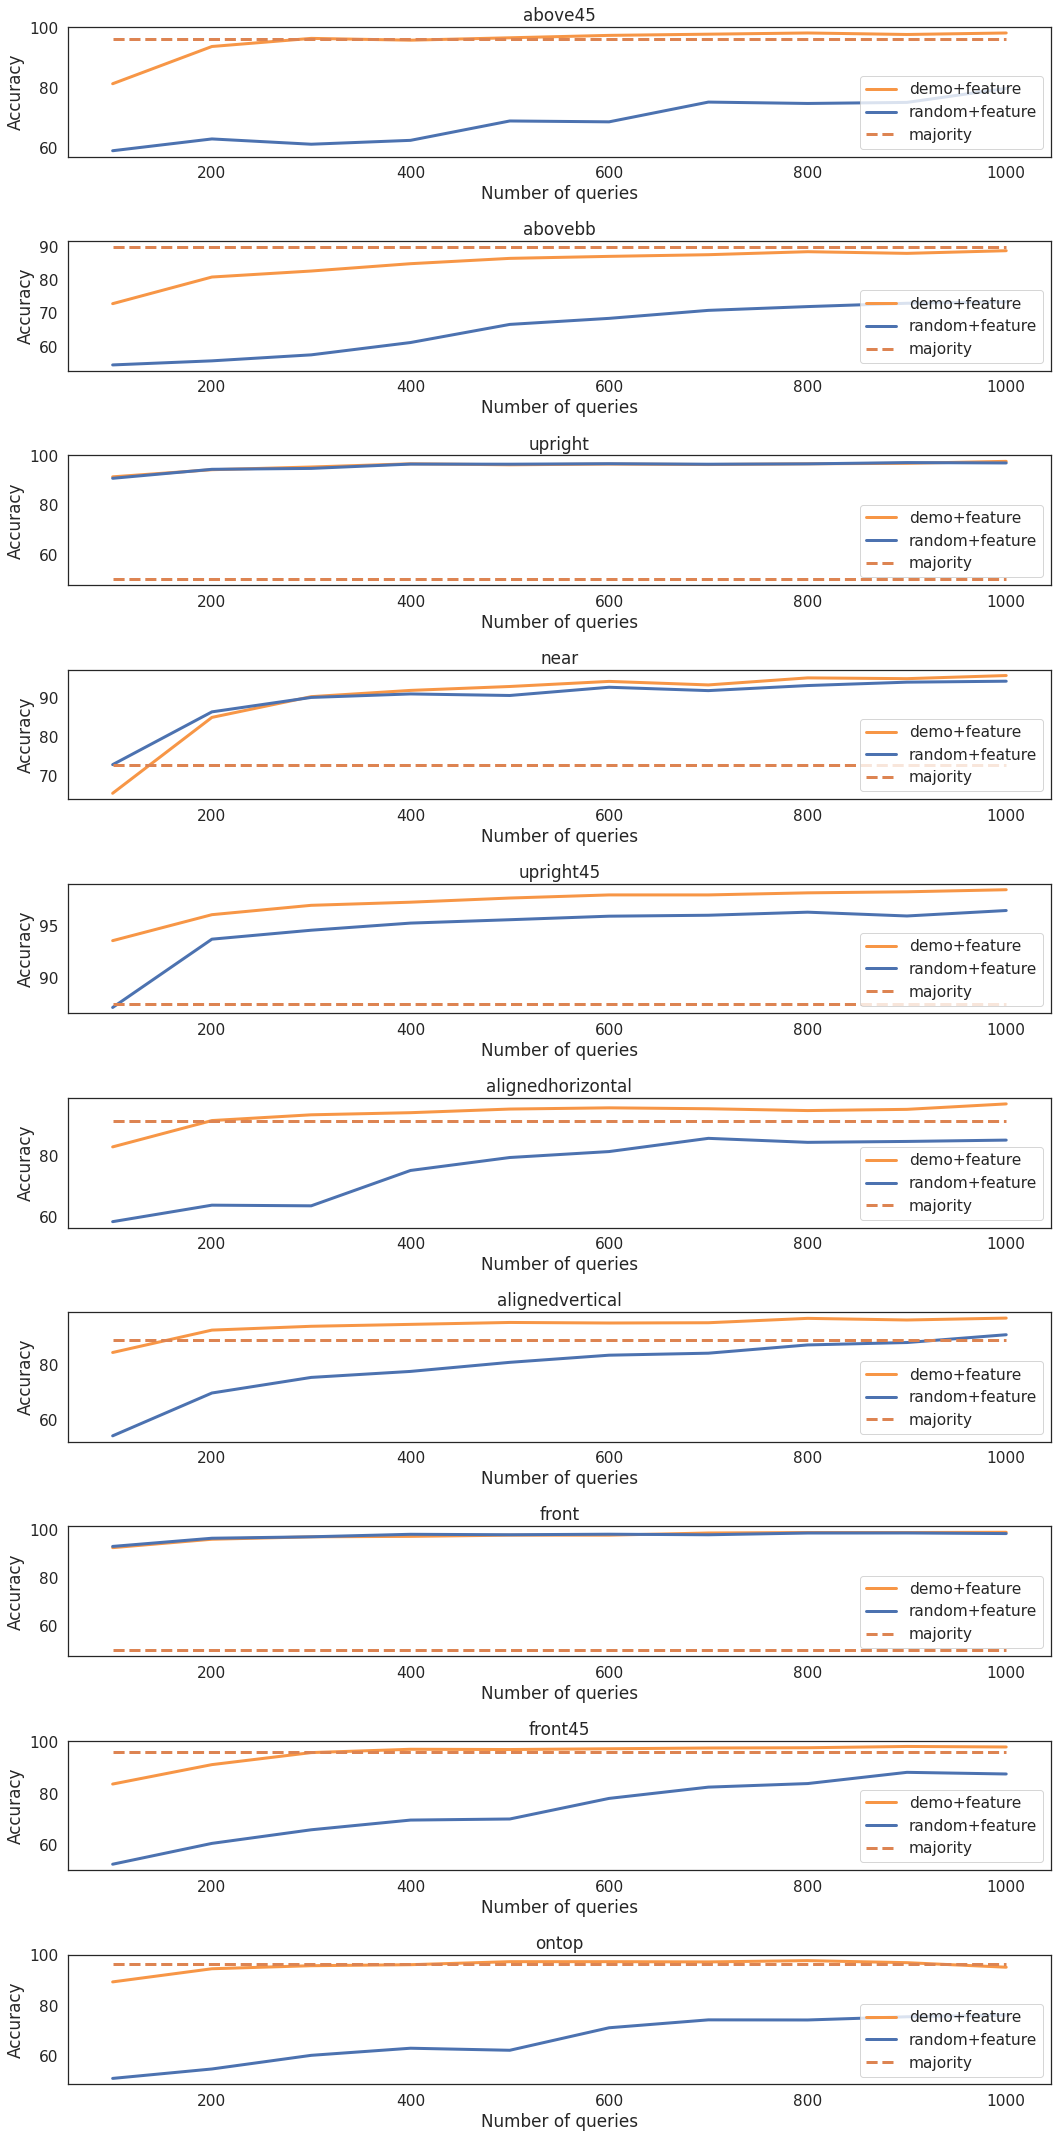

In [5]:
fig, axs = plt.subplots(len(concepts), figsize=(15,30))
for i in range(len(concepts)):
    axs[i].plot(datas, g_demo[i], label='demo+feature', color=our_color, linewidth=3.0)
    axs[i].plot(datas, np.array(g_random[i])*100, label='random+feature', linewidth=3.0)
    axs[i].plot(datas, [majority[i]]*10, '--', label='majority', linewidth=3.0)
    axs[i].legend(loc='lower right')
    axs[i].set_title(concepts[i])
    axs[i].set_xlabel("Number of queries")
    axs[i].set_ylabel("Accuracy")
fig.tight_layout()
plt.show()

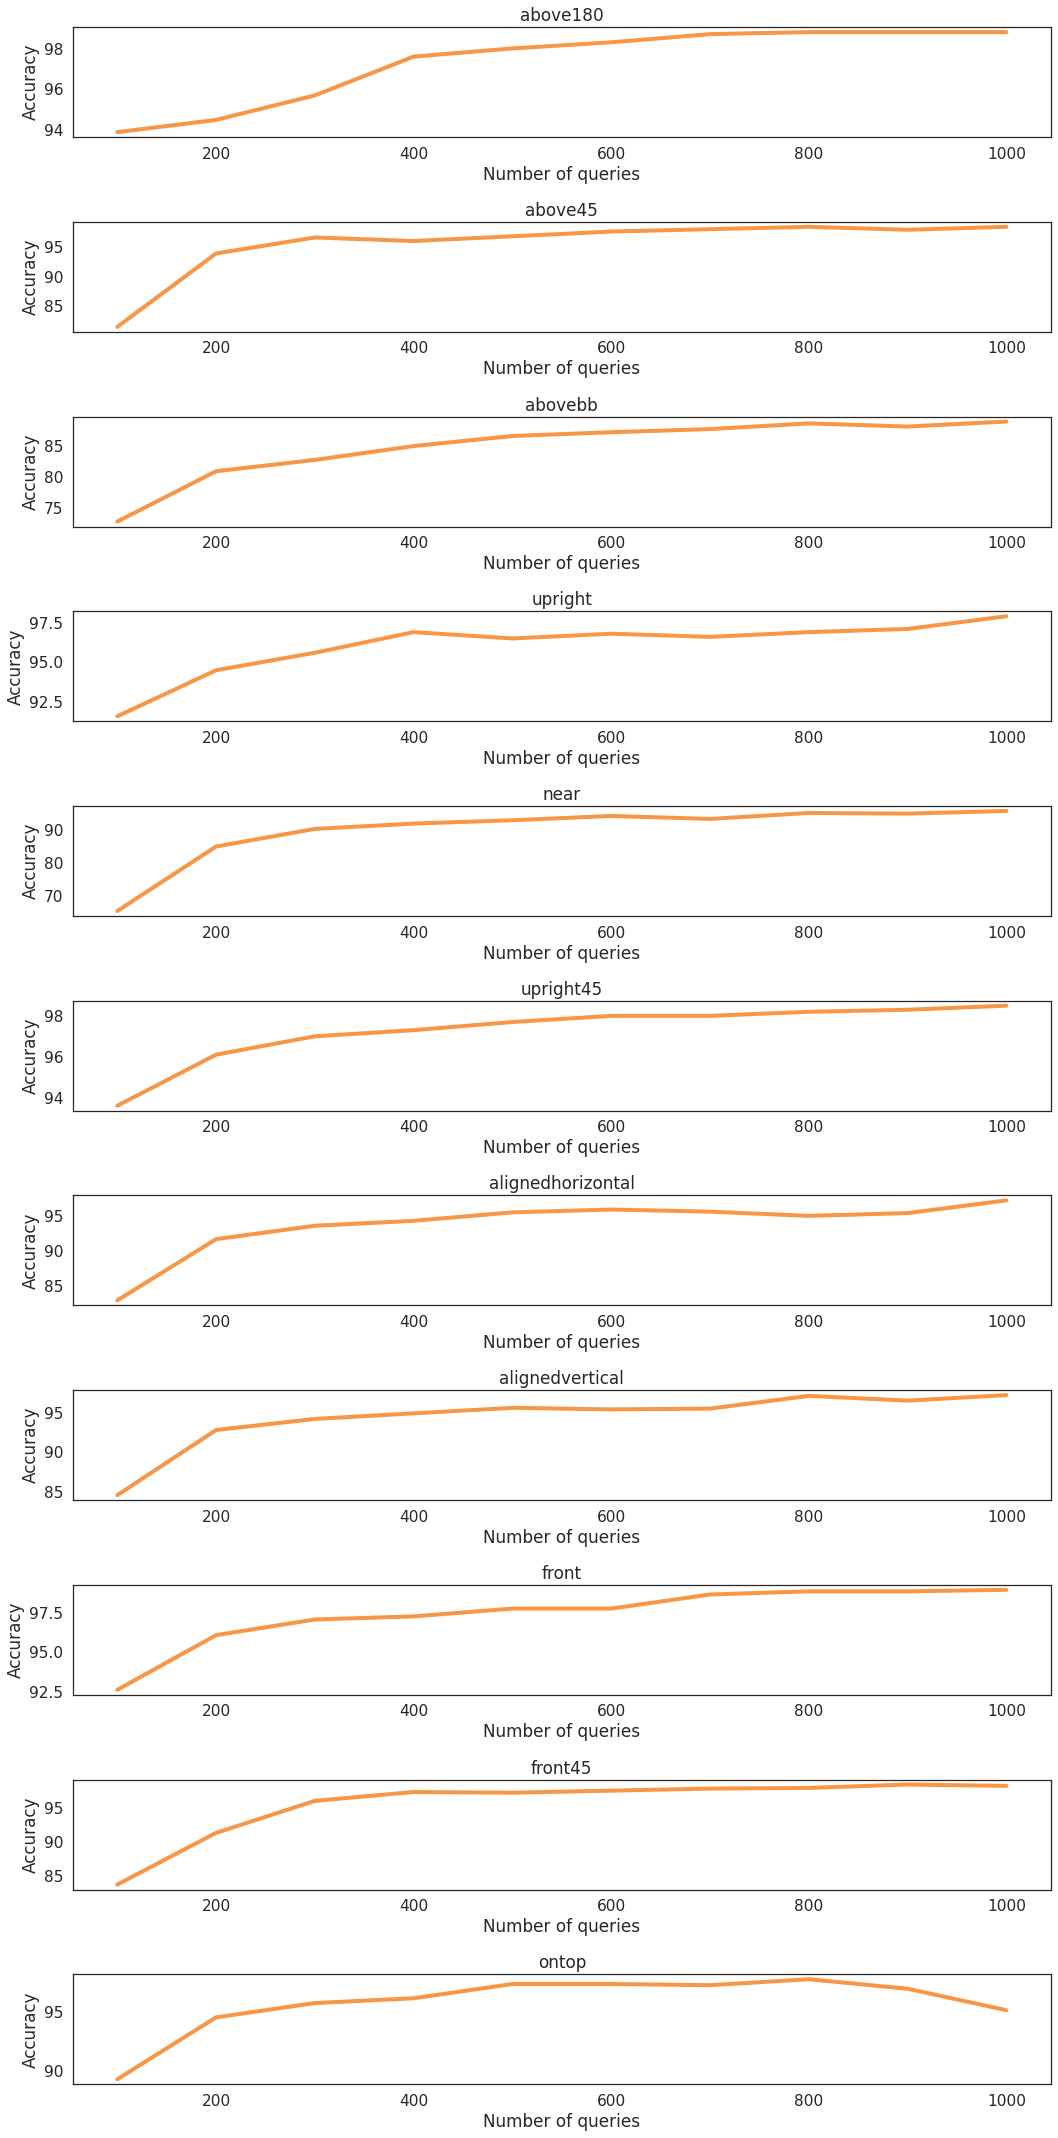

In [13]:
#matplotlib.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(len(concepts), figsize=(15,30))
for i in range(len(concepts)):
    axs[i].plot(datas, g[i], label='g', color=our_color, linewidth=4.0)
    #axs[i].legend()
    axs[i].set_title(concepts[i])
    axs[i].set_xlabel("Number of queries")
    axs[i].set_ylabel("Accuracy")
fig.tight_layout()
plt.show()

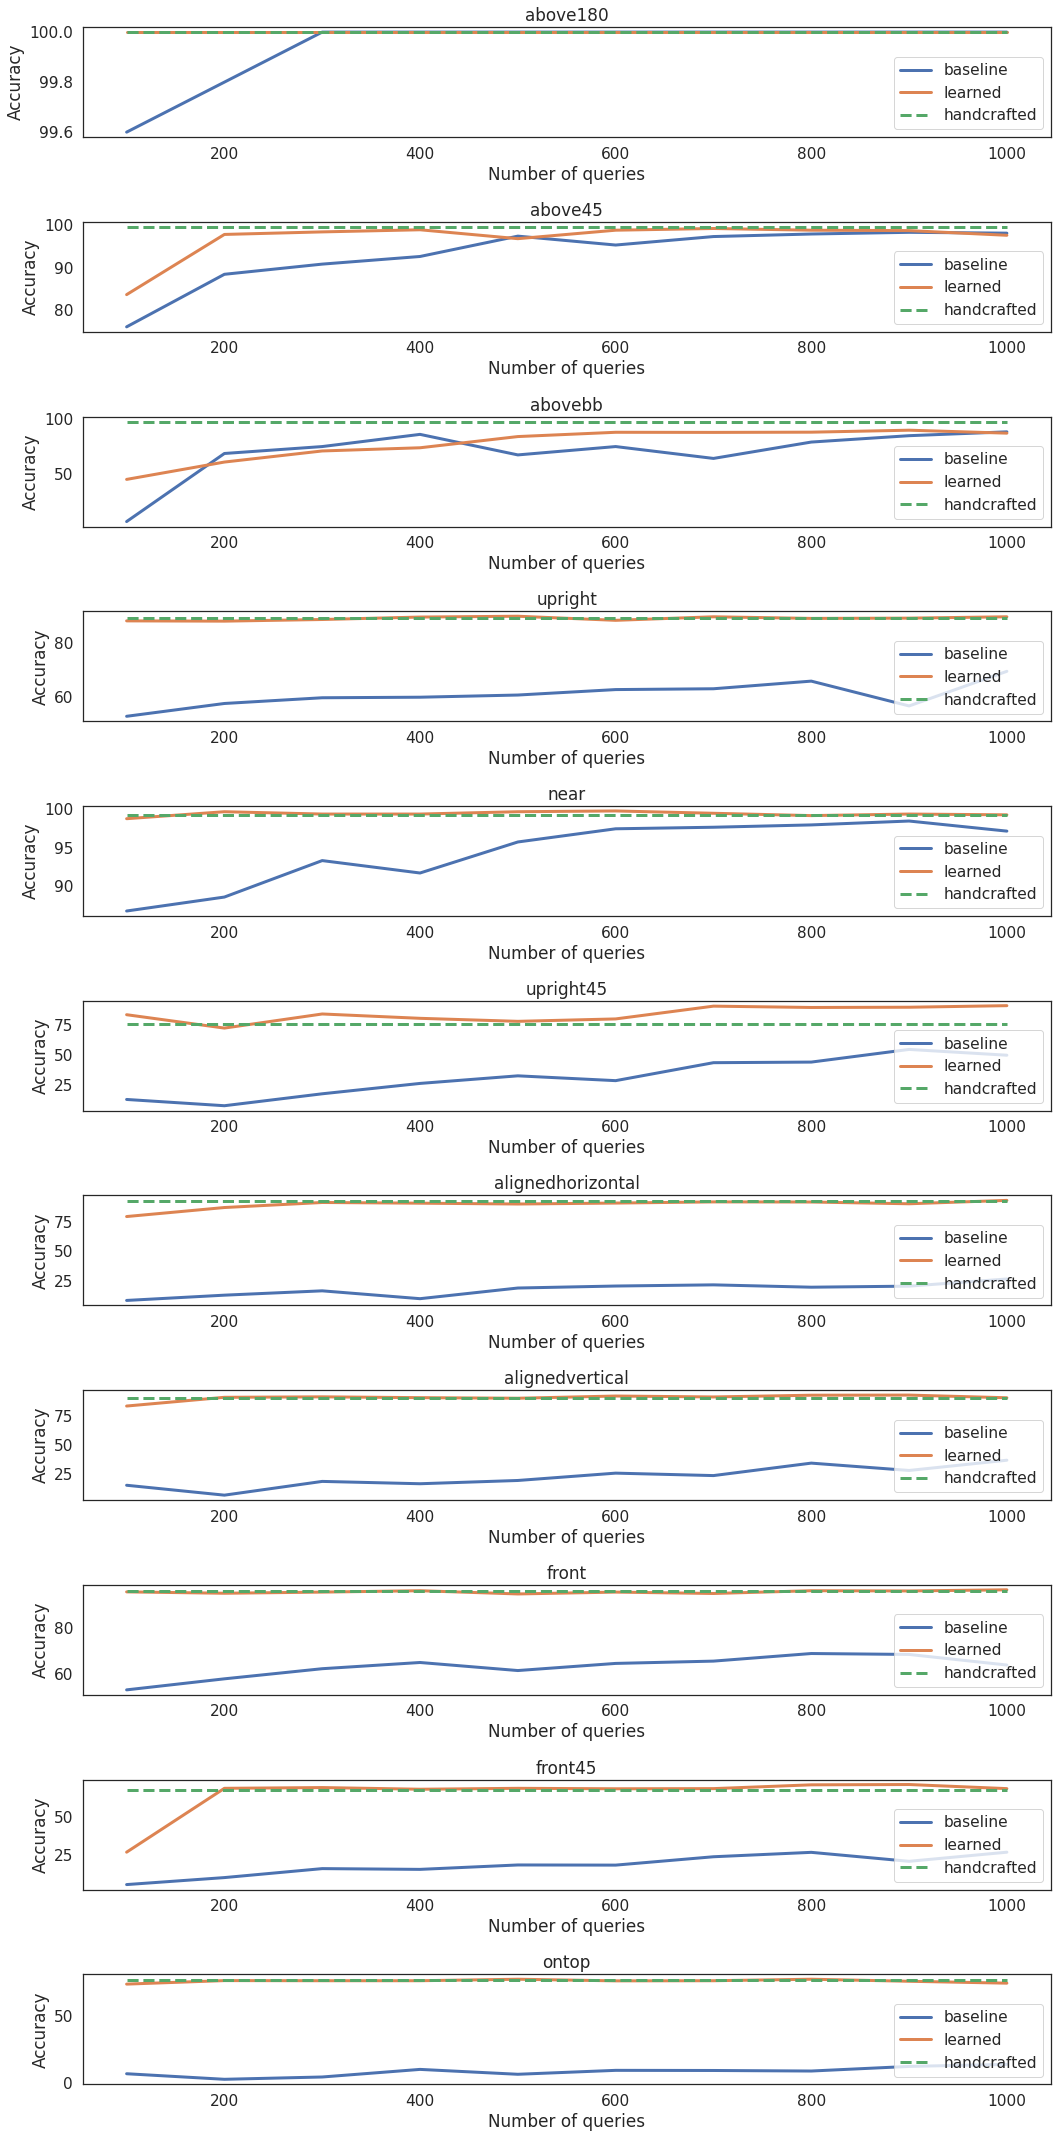

In [18]:
fig, axs = plt.subplots(len(concepts), figsize=(15,30))
for i in range(len(concepts)):
    axs[i].plot(datas, baseline[i], label='baseline', linewidth=3.0)
    axs[i].plot(datas, learned[i], label='learned', linewidth=3.0)
    axs[i].plot(datas, handcrafted[i], '--', label='handcrafted', linewidth=3.0)
    axs[i].legend(loc='lower right')
    axs[i].set_title(concepts[i])
    axs[i].set_xlabel("Number of queries")
    axs[i].set_ylabel("Accuracy")
fig.tight_layout()
plt.show()

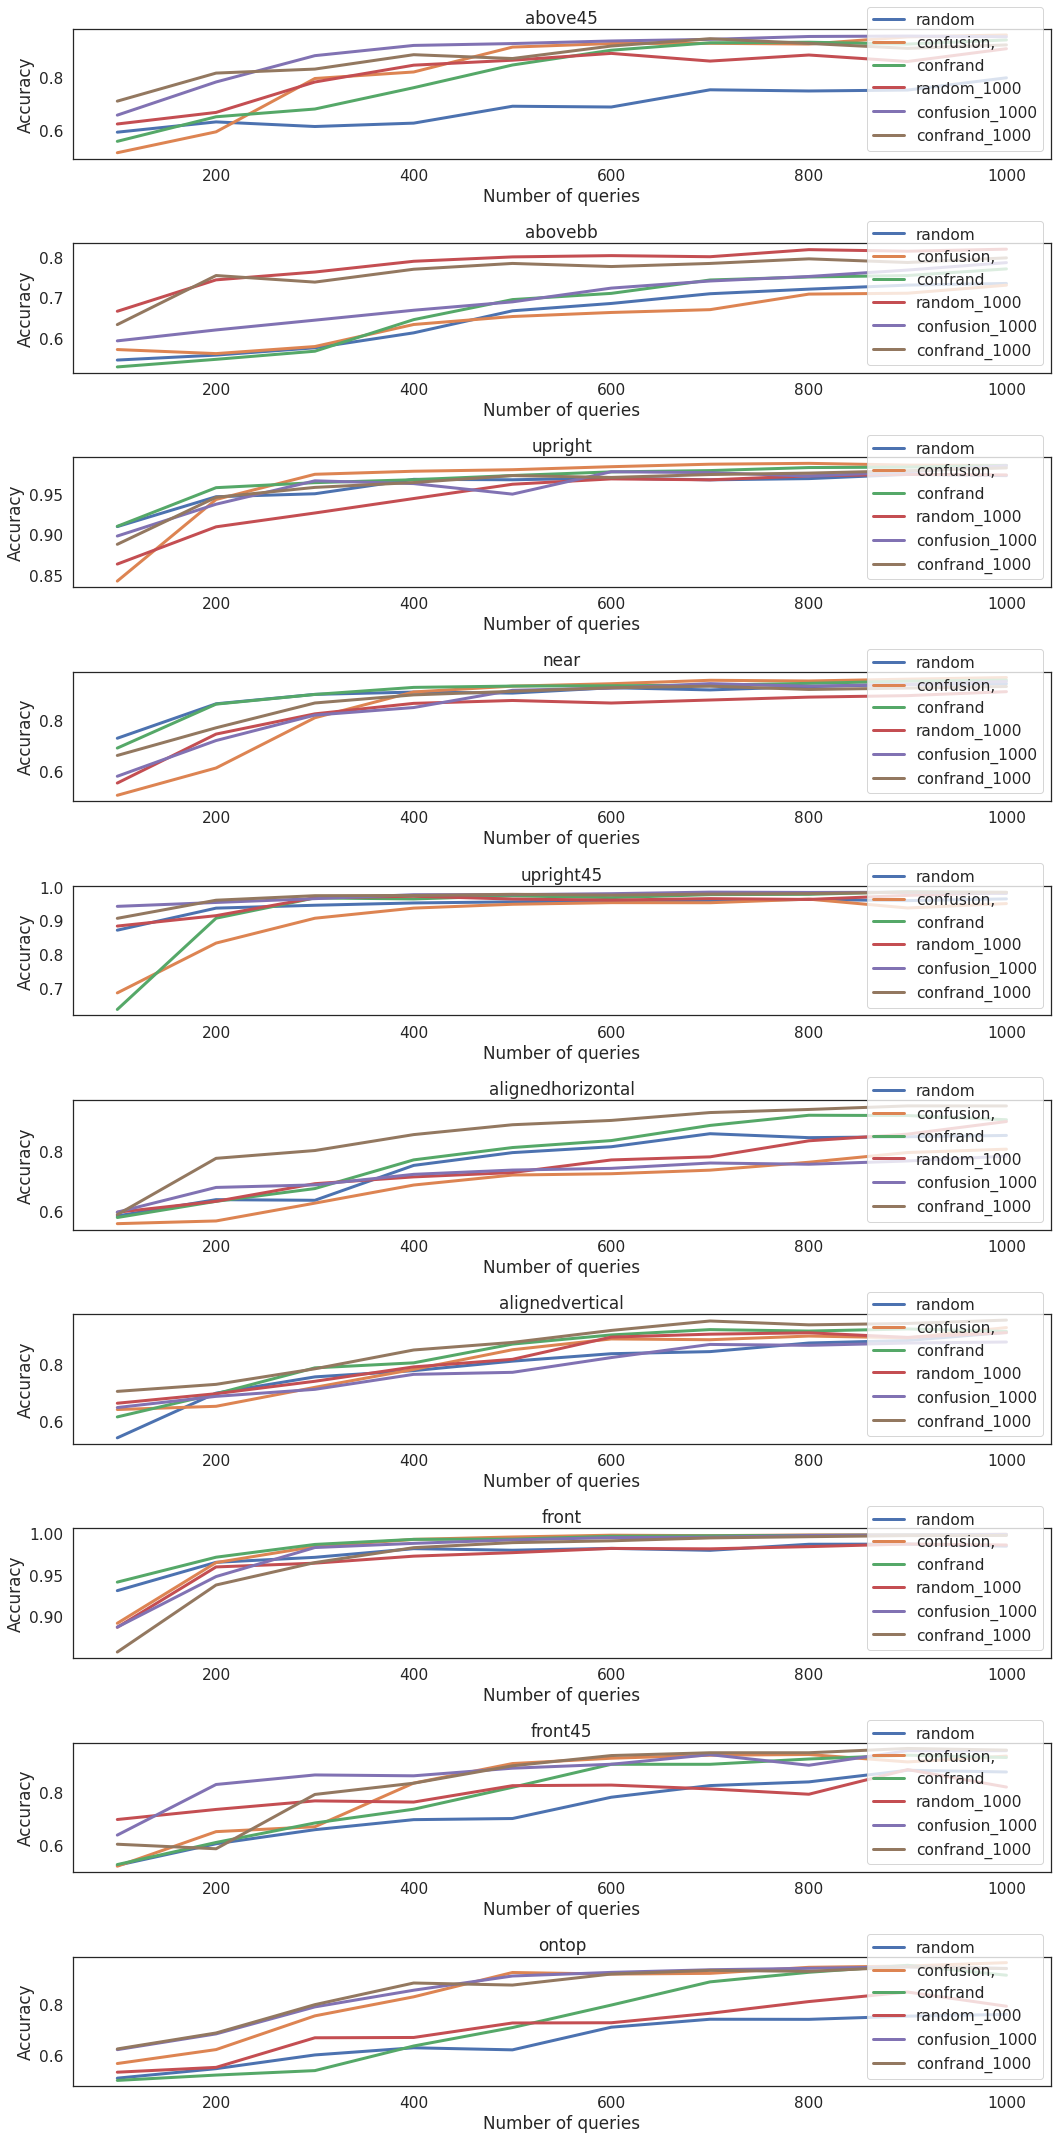

In [7]:
fig, axs = plt.subplots(len(concepts), figsize=(15,30))
for i in range(len(concepts)):
    for j in range(len(strats)):
        axs[i].plot(datas, g_AL[i][j], label='{}'.format(strats[j]), linewidth=3.0)
    axs[i].legend(loc='lower right')
    axs[i].set_title(concepts[i])
    axs[i].set_xlabel("Number of queries")
    axs[i].set_ylabel("Accuracy")
fig.tight_layout()
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino


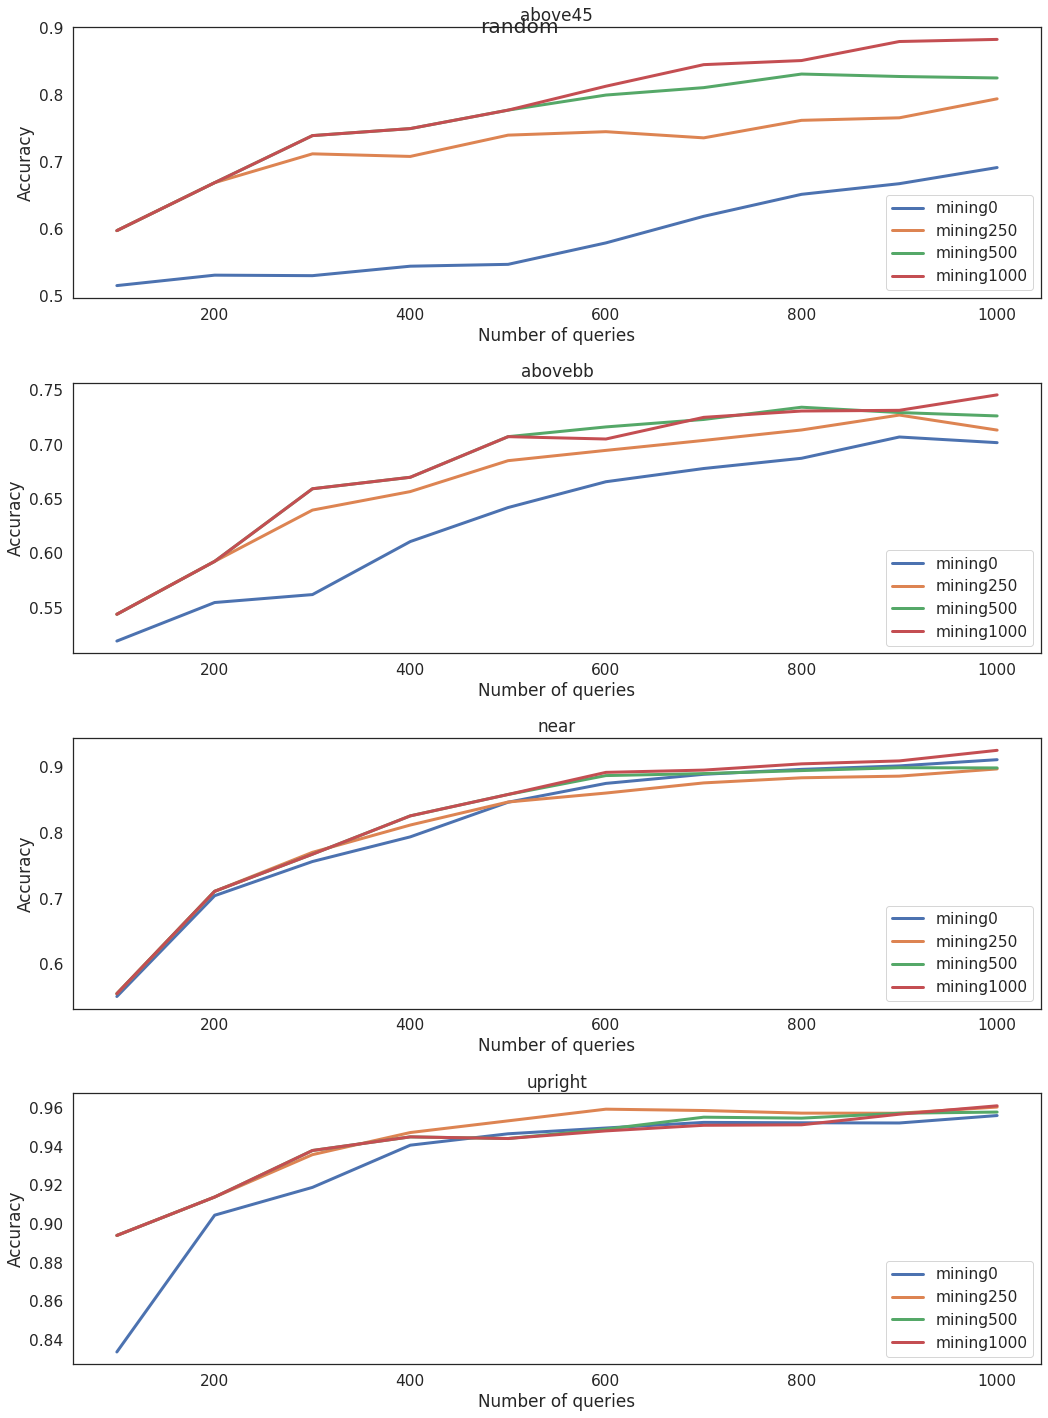

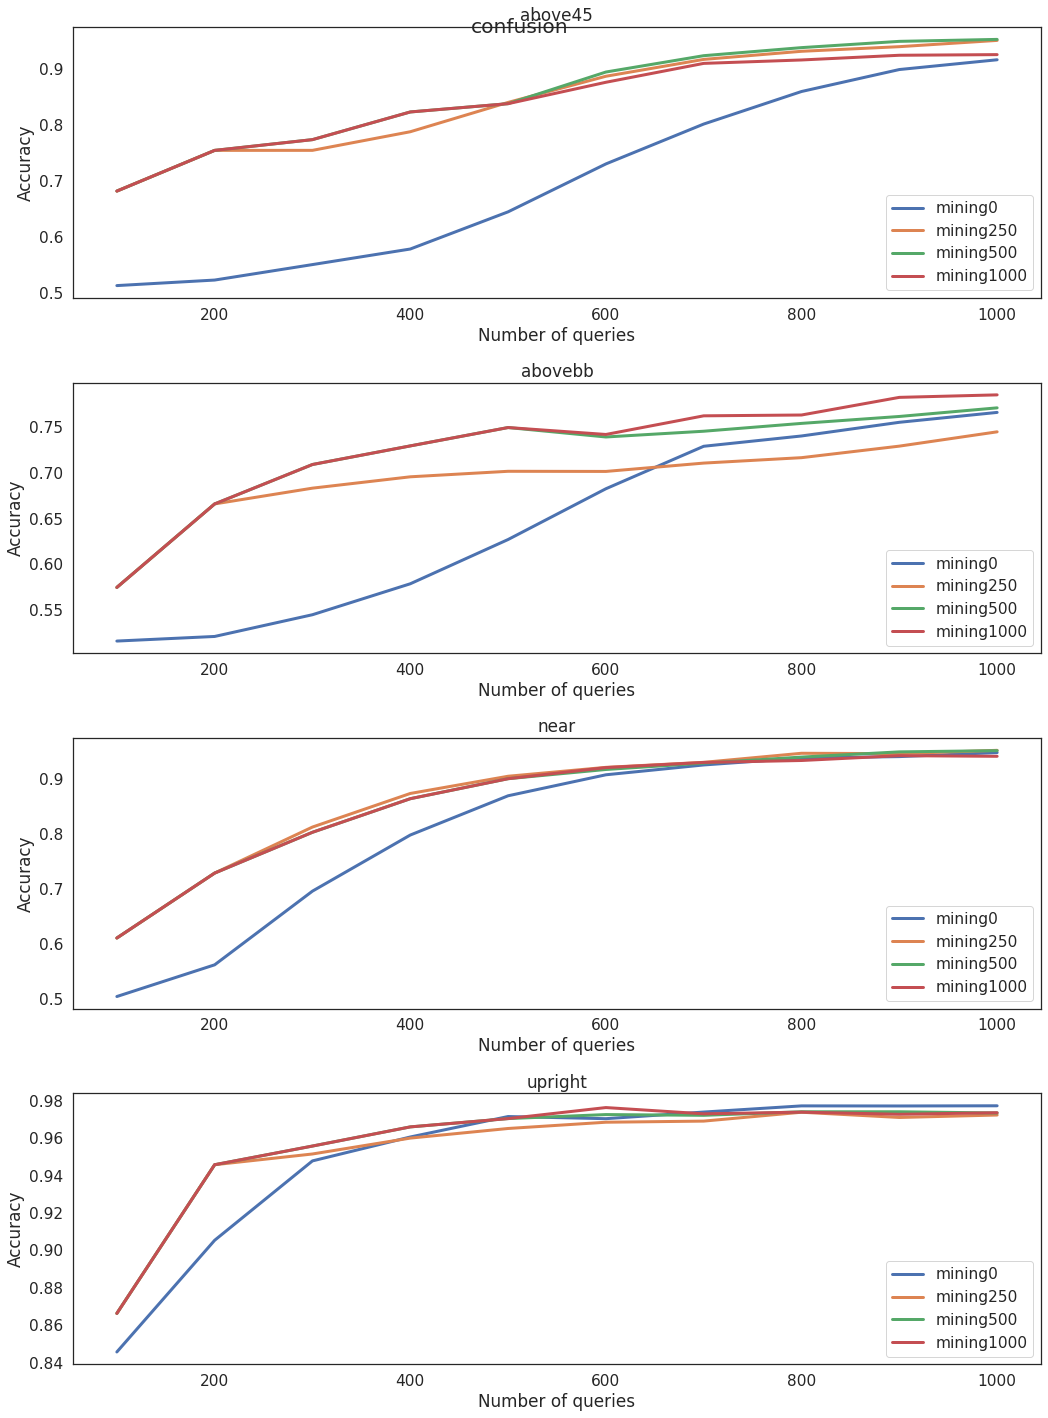

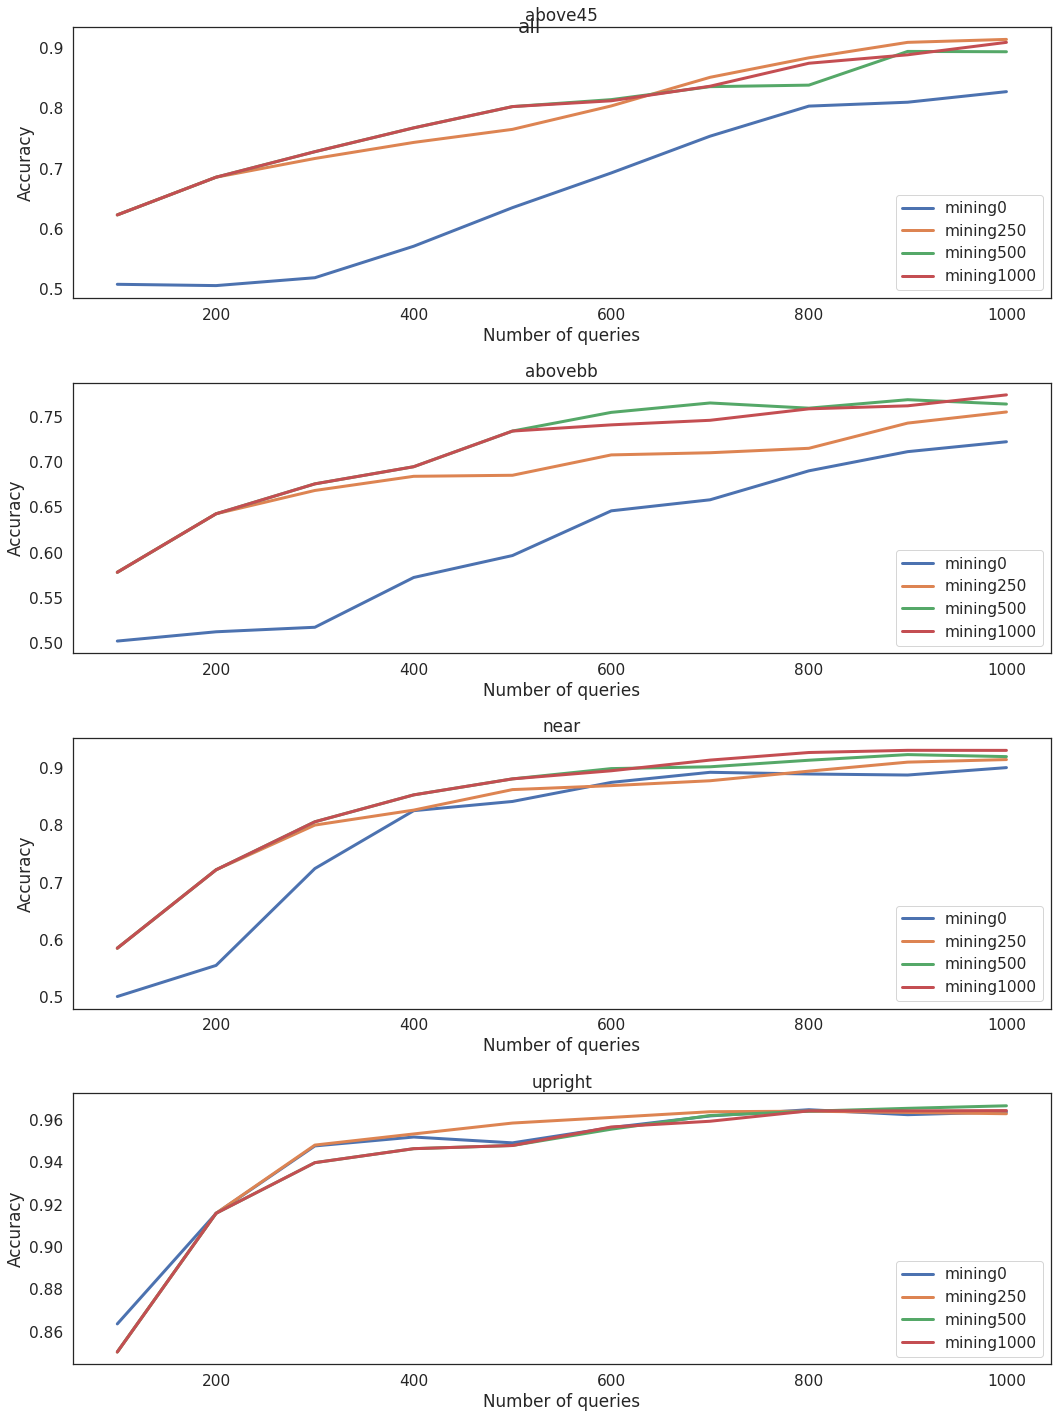

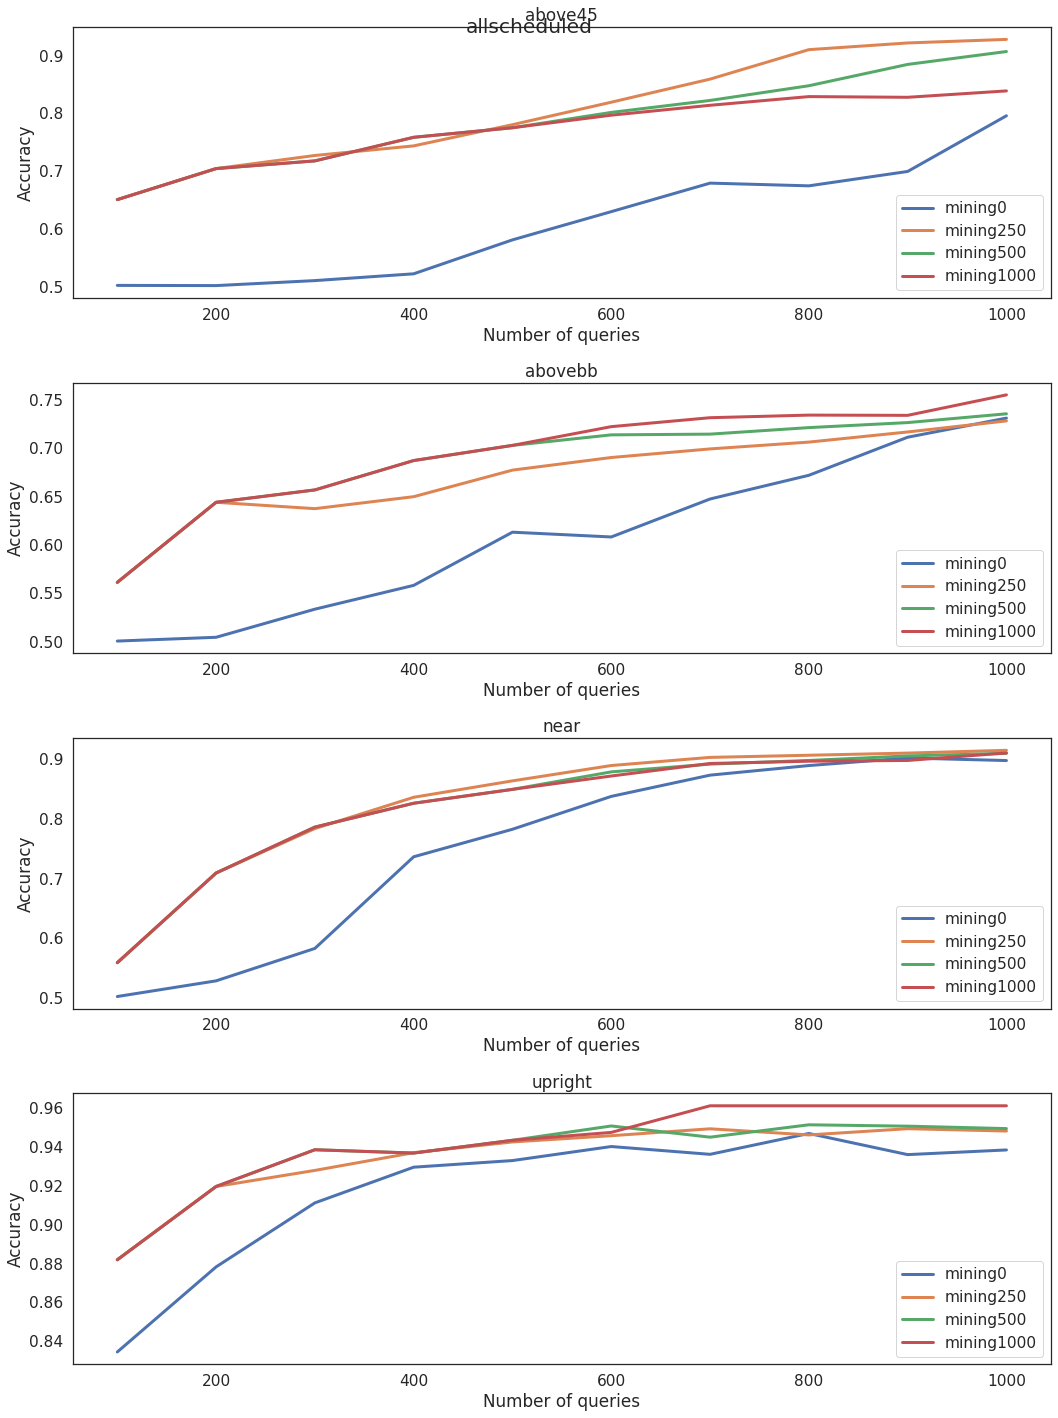

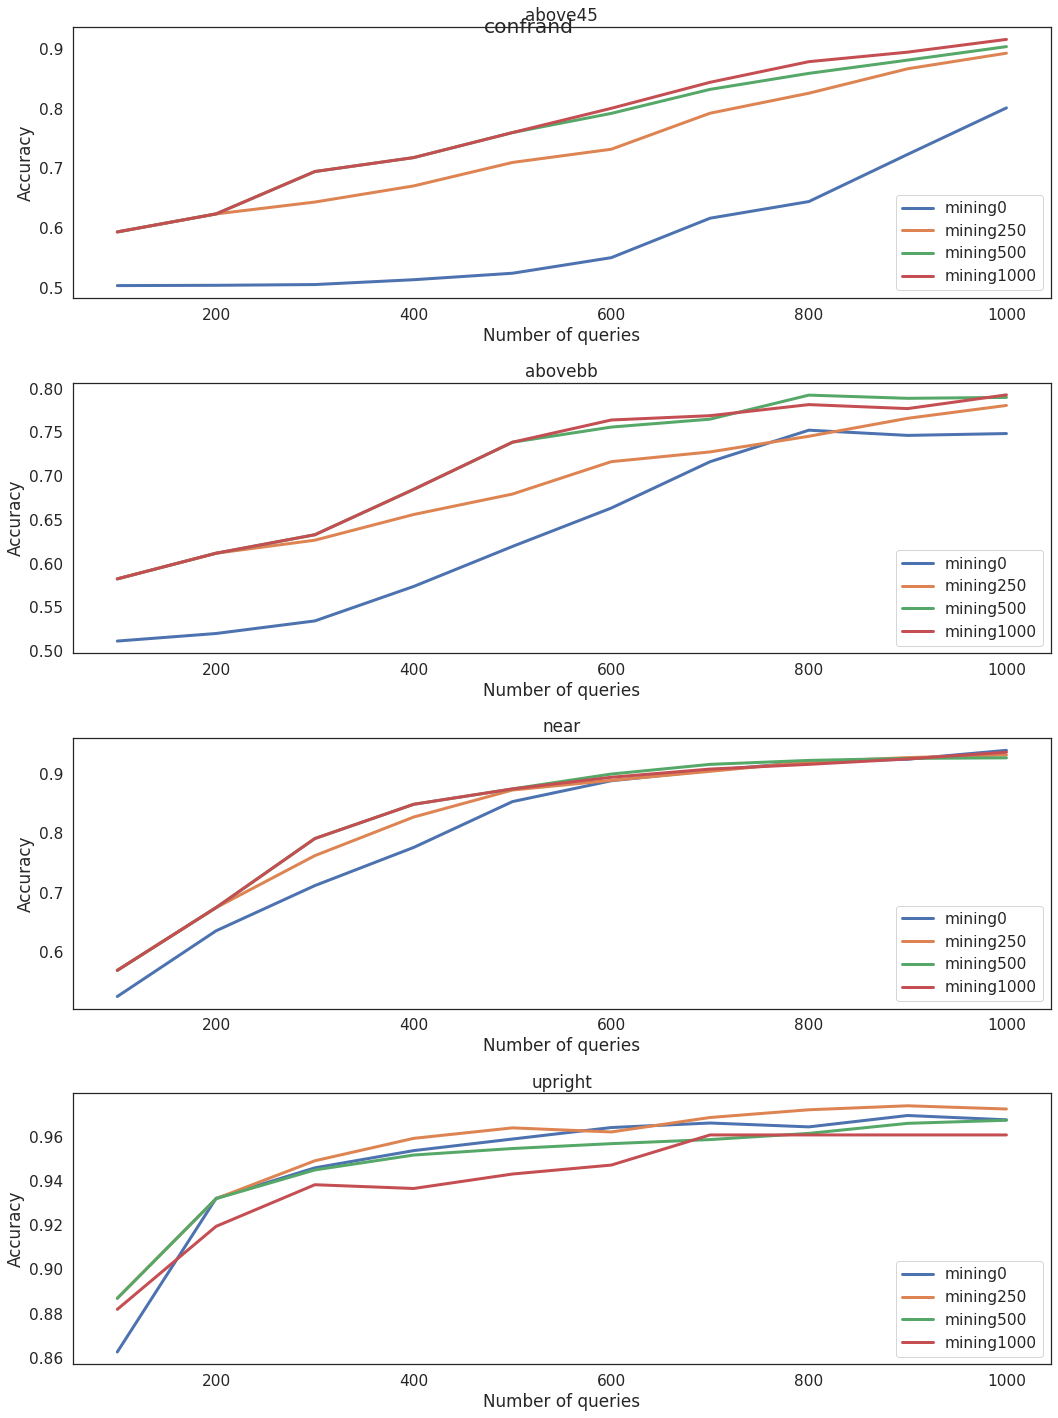

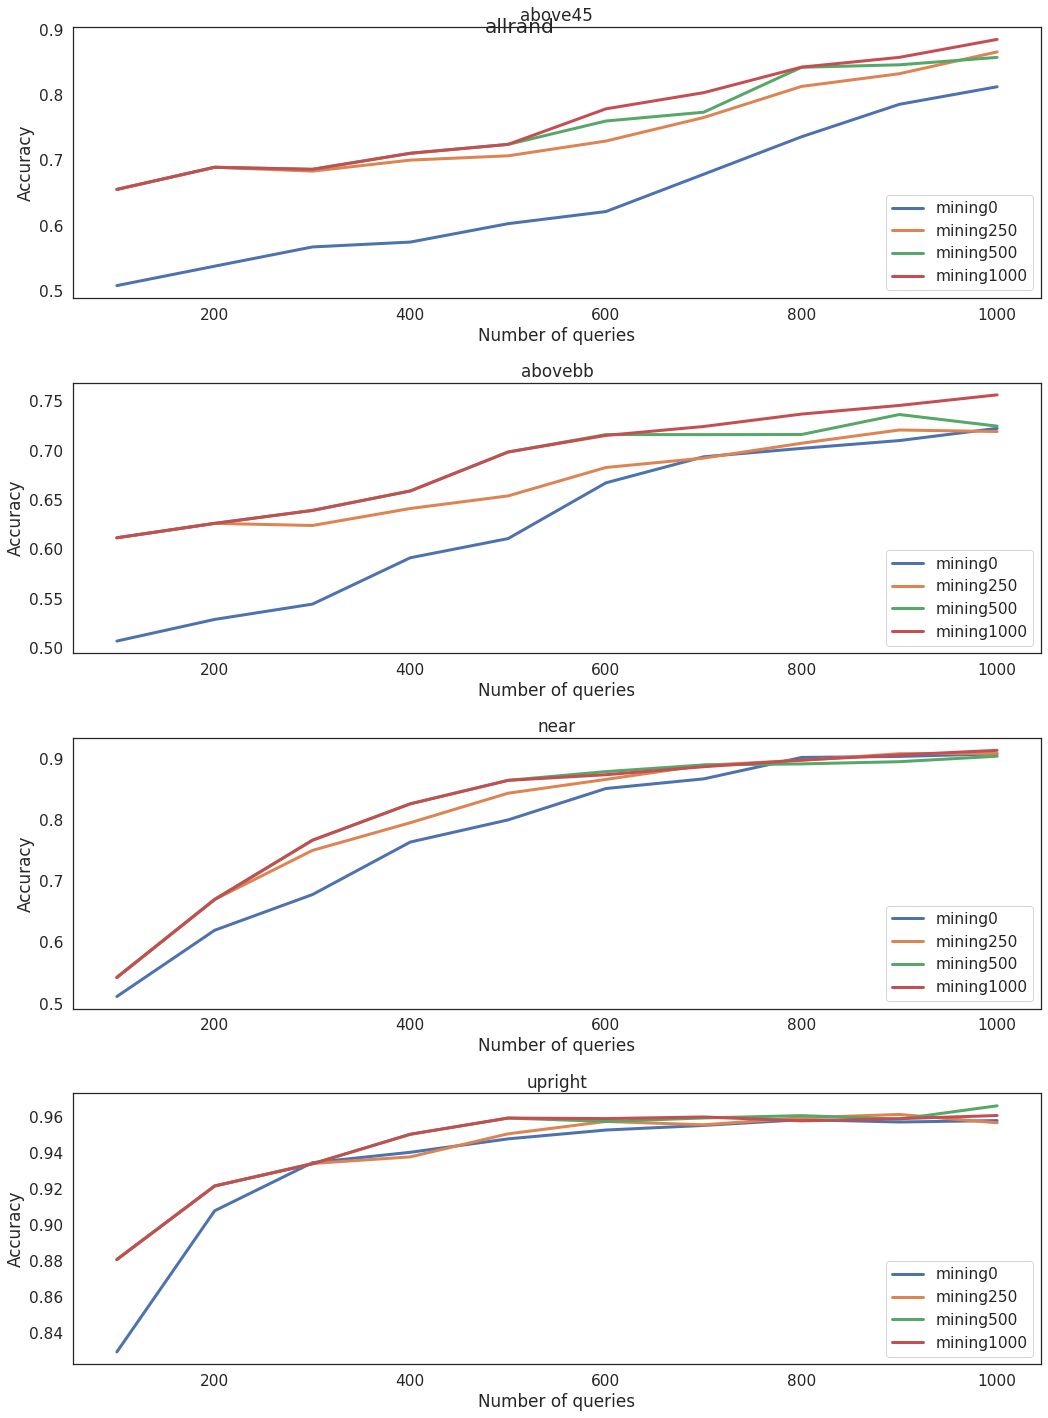

In [135]:
mining = ["mining0", "mining250", "mining500", "mining1000"]
for j in range(len(strats)):
    fig, axs = plt.subplots(len(concepts), figsize=(15,20))
    for i in range(len(concepts)):
        for k, g_AL in enumerate([g_AL0, g_AL250, g_AL500, g_AL1000]):
            axs[i].plot(datas, g_AL[i][j], label=mining[k], linewidth=3.0)
            axs[i].legend(loc='lower right')
            axs[i].set_title(concepts[i])
            axs[i].set_xlabel("Number of queries")
            axs[i].set_ylabel("Accuracy")
    fig.tight_layout()
    fig.suptitle(strats[j])
    plt.show()